In [9]:
from misc import save_to_pickle, load_from_pickle
import pandas as pd
import numpy as np

# Getting all the processed data
combined_df = load_from_pickle("unprocessed_data") # Original and untouched

clustered_data_load= load_from_pickle("direct_clustered_data") # Clustering performed without applying PCA first
clustered_data_1= clustered_data_load["cir_data_pca"]

clustered_data_load2 = load_from_pickle("pca_clustered_data") # Clustering performed but WITH PCA applied first
clustered_data_2 = clustered_data_load2["cir_data_pca"]

dbscan_data_1 = load_from_pickle("8_features_DBSCAN_data") # DBSCAN with Method 1: Drop all CIR columns, then PCA
dbscan_data_2 = load_from_pickle("direct_PCA_DBSCAN_data")  # DBSCAN with Method 2: Apply PCA directly
dbscan_data_3 = load_from_pickle("unscaled_DBSCAN_data") # DBSCAN with Method 3: DF Without PCA

In [2]:
from misc import save_to_pickle, load_from_pickle
import pandas as pd
import numpy as np

dataset_1 = load_from_pickle("dataset_1")
dataset_2 = load_from_pickle("dataset_2")
dataset_3 = load_from_pickle("dataset_3")
dataset_4 = load_from_pickle("dataset_4")

Supervised Learning using Support Vector Machines

In [8]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.preprocessing import StandardScaler

# Select the features to be used for Support Vector Classification
X = combined_df[['RANGE', 'FP_AMP1', 'CIR_PWR']]
Y = combined_df['NLOS']

# Standardizing the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split dataset into 70% training and 30% test
X_train, X_test, y_train, y_test = train_test_split(X_scaled, Y, test_size = 0.3)


In [9]:
# Create a SVM Classifier with the kernel of radial basis function (RBF) for non-linear hyperplane
clf = SVC(kernel = 'rbf')

# Train the model using the training sets
clf.fit(X_train, y_train)

# Predict the response for the test dataset
y_pred = clf.predict(X_test)

In [10]:
# Model Accuracy: How often is the classifier correct
print("Accuracy: ", metrics.accuracy_score(y_test, y_pred))

# Model Precision: what percentage of positive tuples are labeled as such?
print("Precision:",metrics.precision_score(y_test, y_pred))

# Model Recall: what percentage of positive tuples are labelled as such?
print("Recall:",metrics.recall_score(y_test, y_pred))

Accuracy:  0.7942857142857143
Precision: 0.8742868785656072
Recall: 0.6848068943504628


Confusion Matrix is a performance evaluation tool in machine learning, representing the accuracy of a classification model. It displays the number of true positives, true negatives, false positives, and false negatives. This matrix aids in analyzing model performance, identifying misclassifications, and improving predictive accuracy.

![alt text](https://av-eks-blogoptimized.s3.amazonaws.com/Basic-Confusion-matrix.png)

True Positive
- The predicted value matches the actual value, or the predicted class matches the actual class

True Negative
- The predicted value matches the actual value, or the predicted class matches the actual class

False Positive
- The predicted value was falsely predicted
- The actual value was negative, but the model predicted a positive value

False Negative
- The predicted value was falsely predicted
- The actual value was positive, but the model predicted a negative value

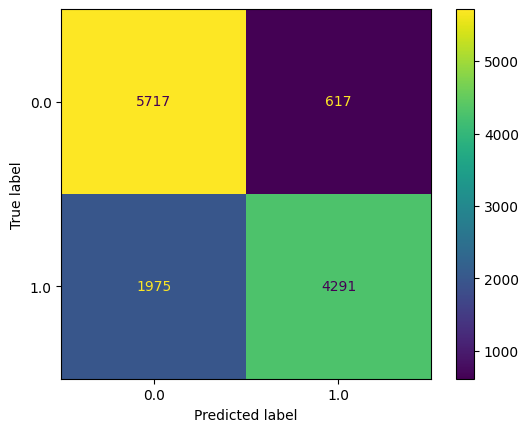

In [11]:
import matplotlib.pyplot as plt

predictions = clf.predict(X_test)
cm = confusion_matrix(y_test, predictions, labels=clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = clf.classes_)
disp.plot()
plt.show()

Random Forest?

With Original (70,30)

In [22]:
from sklearn.ensemble import RandomForestClassifier

# Define features and target variable
X = combined_df.drop('NLOS', axis=1)
y = combined_df['NLOS']

# Split data into train and test sets (70:30)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train Random Forest classifier
rf_classifier = RandomForestClassifier()
rf_classifier.fit(X_train, y_train)

# Evaluate performance
from sklearn.metrics import accuracy_score, classification_report
y_pred = rf_classifier.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.8754761904761905
Classification Report:
               precision    recall  f1-score   support

         0.0       0.84      0.92      0.88      6250
         1.0       0.91      0.83      0.87      6350

    accuracy                           0.88     12600
   macro avg       0.88      0.88      0.88     12600
weighted avg       0.88      0.88      0.88     12600



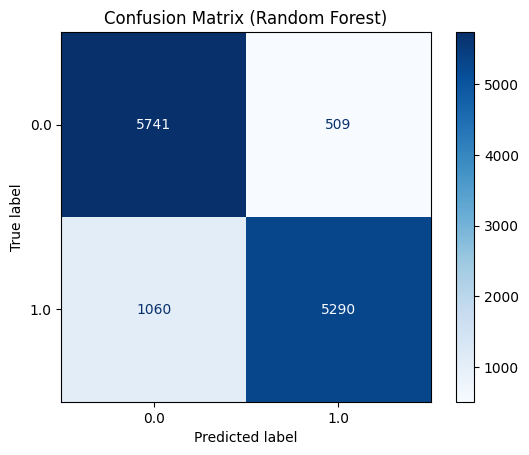

In [23]:

import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Compute confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=rf_classifier.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix (Random Forest)')
plt.show()

In [8]:
from sklearn.ensemble import RandomForestClassifier

# Define features and target variable

X = dataset_3.drop('NLOS', axis=1)
y = dataset_3['NLOS']

# Split data into train and test sets (70:30)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train Random Forest classifier
rf_classifier = RandomForestClassifier()
rf_classifier.fit(X_train, y_train)

# Evaluate performance
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
y_pred = rf_classifier.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.9229761904761905
Classification Report:
               precision    recall  f1-score   support

         0.0       0.91      0.94      0.92      4241
         1.0       0.93      0.91      0.92      4159

    accuracy                           0.92      8400
   macro avg       0.92      0.92      0.92      8400
weighted avg       0.92      0.92      0.92      8400



In [6]:
from sklearn.ensemble import RandomForestClassifier

# Define features and target variable

X = dataset_4.drop('NLOS', axis=1)
y = dataset_4['NLOS']

# Split data into train and test sets (70:30)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train Random Forest classifier
rf_classifier = RandomForestClassifier()
rf_classifier.fit(X_train, y_train)

# Evaluate performance
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
y_pred = rf_classifier.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.9038095238095238
Classification Report:
               precision    recall  f1-score   support

         0.0       0.89      0.93      0.91      6284
         1.0       0.92      0.88      0.90      6316

    accuracy                           0.90     12600
   macro avg       0.90      0.90      0.90     12600
weighted avg       0.90      0.90      0.90     12600



In [7]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split

# Define features and target variable
X = dataset_3.drop('NLOS', axis=1) #features
y = dataset_3['NLOS'] # target

# Split data into train and test sets (80:20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Gradient Boosting classifier
gb_classifier = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, random_state=42)
gb_classifier.fit(X_train, y_train)

# Predict
y_pred_gb = gb_classifier.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred_gb)
print(f"Mean Squared Error: {mse}")

print("Accuracy (Gradient Boosting):", accuracy_score(y_test, y_pred_gb))
print("Classification Report (Gradient Boosting):\n", classification_report(y_test, y_pred_gb))

Mean Squared Error: 0.08857142857142856
Accuracy (Gradient Boosting): 0.9114285714285715
Classification Report (Gradient Boosting):
               precision    recall  f1-score   support

         0.0       0.90      0.93      0.91      4241
         1.0       0.92      0.90      0.91      4159

    accuracy                           0.91      8400
   macro avg       0.91      0.91      0.91      8400
weighted avg       0.91      0.91      0.91      8400



With DB_SCAN_3 (70,30)

In [30]:
from sklearn.ensemble import RandomForestClassifier

# Define features and target variable
X = dbscan_data_3.drop('NLOS', axis=1)
y = dbscan_data_3['NLOS']

# Split data into train and test sets (70:30)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train Random Forest classifier
rf_classifier = RandomForestClassifier()
rf_classifier.fit(X_train, y_train)

# Evaluate performance
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
y_pred = rf_classifier.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.9186507936507936
Classification Report:
               precision    recall  f1-score   support

         0.0       0.90      0.93      0.92      6250
         1.0       0.93      0.90      0.92      6350

    accuracy                           0.92     12600
   macro avg       0.92      0.92      0.92     12600
weighted avg       0.92      0.92      0.92     12600



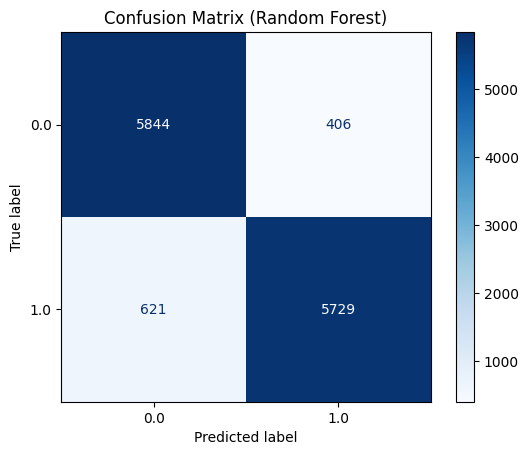

In [25]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Compute confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=rf_classifier.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix (Random Forest)')
plt.show()

Gradient Boost Classification

Classification result with original Datasets combined (80,20)

In [20]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split

# Define features and target variable
X = combined_df.drop('NLOS', axis=1) #features
y = combined_df['NLOS'] # target

# Split data into train and test sets (80:20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Gradient Boosting classifier
gb_classifier = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, random_state=42)
gb_classifier.fit(X_train, y_train)

# Predict
y_pred_gb = gb_classifier.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred_gb)
print(f"Mean Squared Error: {mse}")

print("Accuracy (Gradient Boosting):", accuracy_score(y_test, y_pred_gb))
print("Classification Report (Gradient Boosting):\n", classification_report(y_test, y_pred_gb))

Mean Squared Error: 0.09333333333333334
Accuracy (Gradient Boosting): 0.9066666666666666
Classification Report (Gradient Boosting):
               precision    recall  f1-score   support

         0.0       0.89      0.93      0.91      4187
         1.0       0.93      0.89      0.90      4213

    accuracy                           0.91      8400
   macro avg       0.91      0.91      0.91      8400
weighted avg       0.91      0.91      0.91      8400



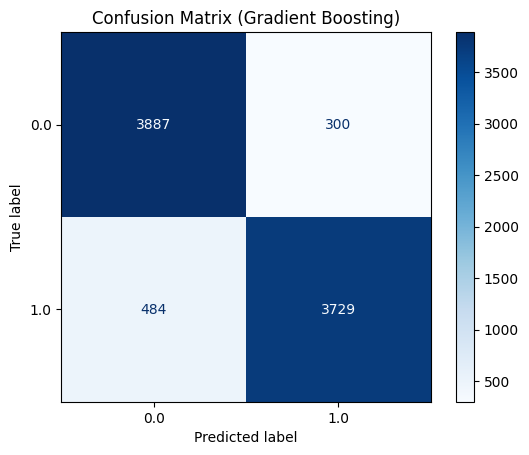

In [21]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Compute confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_gb)

# Plot confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=gb_classifier.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix (Gradient Boosting)')
plt.show()

Classification with DBSCAN data 

DB_SCAN_2 (70:30)

In [14]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split

# Define features and target variable
X = dbscan_data_2.drop('NLOS', axis=1) #features
y = dbscan_data_2['NLOS'] # target

# Split data into train and test sets (70:30)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train Gradient Boosting classifier
gb_classifier = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, random_state=42)
gb_classifier.fit(X_train, y_train)

# Predict
y_pred_gb = gb_classifier.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred_gb)
print(f"Mean Squared Error: {mse}")

print("Accuracy (Gradient Boosting):", accuracy_score(y_test, y_pred_gb))
print("Classification Report (Gradient Boosting):\n", classification_report(y_test, y_pred_gb))

Mean Squared Error: 0.141984126984127
Accuracy (Gradient Boosting): 0.858015873015873
Classification Report (Gradient Boosting):
               precision    recall  f1-score   support

         0.0       0.81      0.93      0.87      6250
         1.0       0.92      0.79      0.85      6350

    accuracy                           0.86     12600
   macro avg       0.86      0.86      0.86     12600
weighted avg       0.87      0.86      0.86     12600



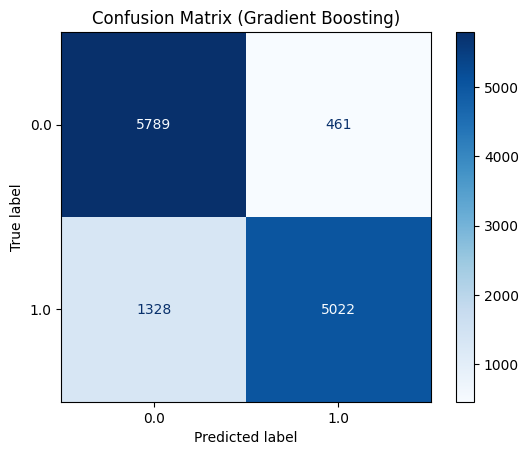

In [15]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Compute confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_gb)

# Plot confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=gb_classifier.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix (Gradient Boosting)')
plt.show()

DB_SCAN 3 (70:30)

In [16]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split

# Define features and target variable
X = dbscan_data_3.drop('NLOS', axis=1) #features
y = dbscan_data_3['NLOS'] # target

# Split data into train and test sets (70:30)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train Gradient Boosting classifier
gb_classifier = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, random_state=42)
gb_classifier.fit(X_train, y_train)

# Predict
y_pred_gb = gb_classifier.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred_gb)
print(f"Mean Squared Error: {mse}")

print("Accuracy (Gradient Boosting):", accuracy_score(y_test, y_pred_gb))
print("Classification Report (Gradient Boosting):\n", classification_report(y_test, y_pred_gb))

Mean Squared Error: 0.09134920634920635
Accuracy (Gradient Boosting): 0.9086507936507936
Classification Report (Gradient Boosting):
               precision    recall  f1-score   support

         0.0       0.89      0.93      0.91      6250
         1.0       0.93      0.89      0.91      6350

    accuracy                           0.91     12600
   macro avg       0.91      0.91      0.91     12600
weighted avg       0.91      0.91      0.91     12600



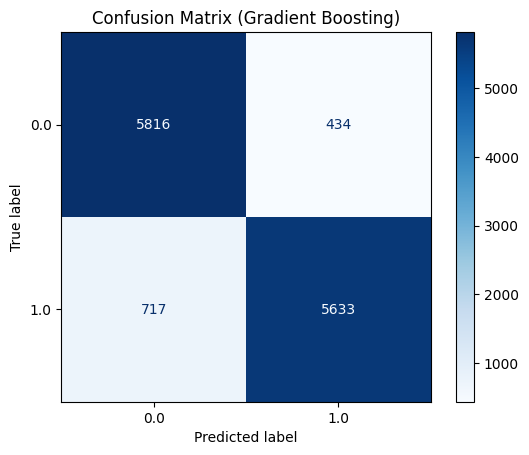

In [17]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Compute confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_gb)

# Plot confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=gb_classifier.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix (Gradient Boosting)')
plt.show()

DB_SCAN_1 (70:30)

In [18]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split

# Define features and target variable
X = dbscan_data_1.drop('NLOS', axis=1) #features
y = dbscan_data_1['NLOS'] # target

# Split data into train and test sets (70:30)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train Gradient Boosting classifier
gb_classifier = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, random_state=42)
gb_classifier.fit(X_train, y_train)

# Predict
y_pred_gb = gb_classifier.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred_gb)
print(f"Mean Squared Error: {mse}")

print("Accuracy (Gradient Boosting):", accuracy_score(y_test, y_pred_gb))
print("Classification Report (Gradient Boosting):\n", classification_report(y_test, y_pred_gb))

Mean Squared Error: 0.14452380952380953
Accuracy (Gradient Boosting): 0.8554761904761905
Classification Report (Gradient Boosting):
               precision    recall  f1-score   support

         0.0       0.81      0.92      0.86      6250
         1.0       0.91      0.79      0.85      6350

    accuracy                           0.86     12600
   macro avg       0.86      0.86      0.85     12600
weighted avg       0.86      0.86      0.85     12600



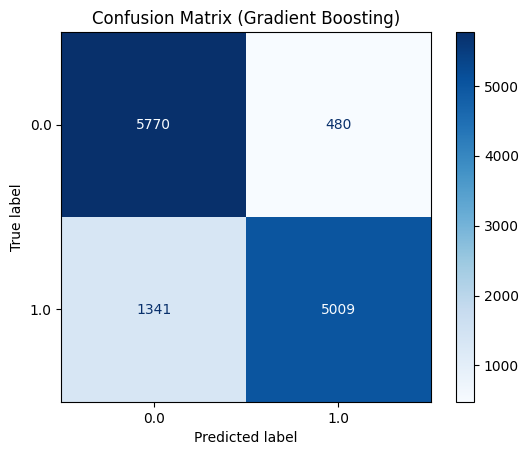

In [19]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Compute confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_gb)

# Plot confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=gb_classifier.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix (Gradient Boosting)')
plt.show()